In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.impute import SimpleImputer

In [2]:
data = pd.read_csv("/content/HeartDisease_Uncleaned_WithNoise.csv")

In [4]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [5]:
data.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
count,1113,1144,1144,1128,1136,1147,1149,1124,1151,1115,1137,1151,1154,1141
unique,46,5,6,75,178,4,5,104,4,48,5,7,7,4
top,58,Male,Typical angina,120,high,Lower than 120 mg/ml,ST-T wave abnormality,fast,No,0.0,Flat,Zero,Fixed Defect,1
freq,68,744,526,128,59,913,546,45,722,329,482,612,571,554


In [6]:
data.isnull().sum()


,0
age,62
sex,31
chest_pain_type,31
resting_blood_pressure,47
cholestoral,39
fasting_blood_sugar,28
rest_ecg,26
Max_heart_rate,51
exercise_induced_angina,24
oldpeak,60


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1175 entries, 0 to 1174
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   age                            1113 non-null   object
 1   sex                            1144 non-null   object
 2   chest_pain_type                1144 non-null   object
 3   resting_blood_pressure         1128 non-null   object
 4   cholestoral                    1136 non-null   object
 5   fasting_blood_sugar            1147 non-null   object
 6   rest_ecg                       1149 non-null   object
 7   Max_heart_rate                 1124 non-null   object
 8   exercise_induced_angina        1151 non-null   object
 9   oldpeak                        1115 non-null   object
 10  slope                          1137 non-null   object
 11  vessels_colored_by_flourosopy  1151 non-null   object
 12  thalassemia                    1154 non-null   object
 13  tar

In [8]:
for col in data.columns:
    if data[col].dtype == 'object':
        print("---------------------------------")
        print("Info of",col)
        print("----------------------------------")
        print(data[col].value_counts())

---------------------------------
Info of age
----------------------------------
age
58       68
57       58
forty    53
54       53
59       46
52       43
56       41
62       39
60       39
44       39
51       39
64       35
67       33
63       33
61       32
41       32
55       30
65       28
43       27
66       27
42       26
53       26
45       26
46       23
48       23
50       22
47       19
49       18
35       16
70       14
39       14
38       12
68       12
71       11
40       11
69       10
34        7
37        6
29        5
76        4
74        4
77        3
73        3
31        1
75        1
33        1
Name: count, dtype: int64
---------------------------------
Info of sex
----------------------------------
sex
Male      744
Female    312
male       31
MALE       29
M          28
Name: count, dtype: int64
---------------------------------
Info of chest_pain_type
----------------------------------
chest_pain_type
Typical angina      526
Non-anginal pain    284

In [9]:
import numpy as np
import pandas as pd

def clean_heart_data(df):

    for col in df.columns:
        df[col] = df[col].astype(str).str.lower().str.strip()
        df[col] = df[col].replace("nan", np.nan)


    df['age'] = df['age'].replace({'forty': '40'})
    df['cholestoral'] = df['cholestoral'].replace({'high': np.nan})
    df['Max_heart_rate'] = df['Max_heart_rate'].replace({'fast': np.nan})
    df['oldpeak'] = df['oldpeak'].replace({'low': np.nan})
    df['thalassemia'] = df['thalassemia'].replace({'no': np.nan})


    replace_map = {
        'zero': 0,
        'one': 1,
        'two': 2,
        'three': 3,
        'four': 4,
        'unknown': np.nan
    }
    df['vessels_colored_by_flourosopy'] = df['vessels_colored_by_flourosopy'].replace(replace_map)


    df['target'] = df['target'].replace({'1.0': 1, '0.0': 0, '1': 1, '0': 0})


    numeric_cols = [
        'age', 'resting_blood_pressure', 'cholestoral',
        'Max_heart_rate', 'oldpeak', 'vessels_colored_by_flourosopy', 'target'
    ]
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')


    df['sex'] = df['sex'].replace({'m': 'male', 'f': 'female'})

    df['chest_pain_type'] = df['chest_pain_type'].replace({
        'typical angina': 'typical angina',
        'atypical': 'atypical angina',
        'non-anginal pain': 'non-anginal pain',
        'asymptomatic': 'asymptomatic'
    })

    df['fasting_blood_sugar'] = df['fasting_blood_sugar'].replace({
        'lower than 120 mg/ml': 'low',
        'greater than 120 mg/ml': 'high',
        'lower': 'low',
        'higher': 'high'
    })

    df['rest_ecg'] = df['rest_ecg'].replace({
        'normal': 'normal',
        'st-t wave abnormality': 'abnormal',
        'left ventricular hypertrophy': 'abnormal',
        'abnormal': 'abnormal'
    })

    df['exercise_induced_angina'] = df['exercise_induced_angina'].replace({
        'yes': 'yes', 'no': 'no'
    })

    df['slope'] = df['slope'].replace({
        'upsloping': 'upsloping',
        'flat': 'flat',
        'down sloping': 'downsloping',
        'downsloping': 'downsloping'
    })

    df['thalassemia'] = df['thalassemia'].replace({
        'normal': 'normal',
        'fixed defect': 'fixed',
        'reversable defect': 'reversable',
        'reversable': 'reversable'
    })

    return df
data = clean_heart_data(data)


<ipython-input-9-fb5cba69ee3c>:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['vessels_colored_by_flourosopy'] = df['vessels_colored_by_flourosopy'].replace(replace_map)


In [10]:
print("After cleaning:")
print(data['age'].value_counts(dropna=False))
print(data['cholestoral'].value_counts(dropna=False))
print(data['Max_heart_rate'].value_counts(dropna=False))
print(data['oldpeak'].value_counts(dropna=False))
print(data['vessels_colored_by_flourosopy'].value_counts(dropna=False))
print(data['thalassemia'].value_counts(dropna=False))
print(data['target'].value_counts(dropna=False))

After cleaning:
age
58.0    68
40.0    64
NaN     62
57.0    58
54.0    53
59.0    46
52.0    43
56.0    41
60.0    39
44.0    39
51.0    39
62.0    39
64.0    35
67.0    33
63.0    33
61.0    32
41.0    32
55.0    30
65.0    28
66.0    27
43.0    27
53.0    26
42.0    26
45.0    26
46.0    23
48.0    23
50.0    22
47.0    19
49.0    18
35.0    16
70.0    14
39.0    14
38.0    12
68.0    12
71.0    11
69.0    10
34.0     7
37.0     6
29.0     5
76.0     4
74.0     4
77.0     3
73.0     3
31.0     1
75.0     1
33.0     1
Name: count, dtype: int64
cholestoral
NaN      98
234.0    22
204.0    21
197.0    19
212.0    18
         ..
279.0     1
339.0     1
112.0     1
280.0     1
374.0     1
Name: count, Length: 178, dtype: int64
Max_heart_rate
NaN      96
162.0    35
160.0    33
152.0    29
163.0    29
         ..
77.0      1
107.0     1
82.0      1
75.0      1
72.0      1
Name: count, Length: 104, dtype: int64
oldpeak
0.0    329
NaN    103
1.2     59
1.0     52
0.8     47
0.6     47
1.4  

In [11]:
data['target'].value_counts()

,count
target,
1.0,554
0.0,525


<Axes: xlabel='target'>

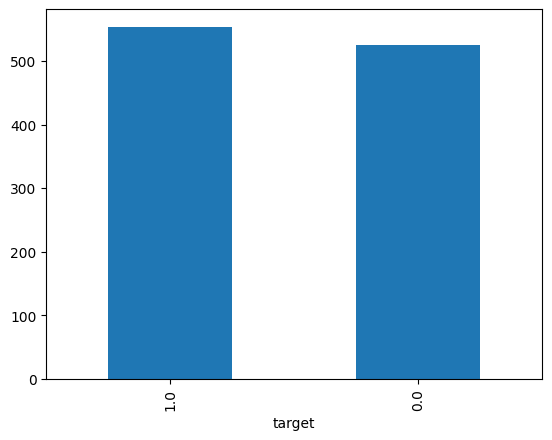

In [12]:
data['target'].value_counts().plot(kind='bar')

In [13]:
data['age'] = pd.to_numeric(data['age'], errors='coerce')
data['resting_blood_pressure'] = pd.to_numeric(data['resting_blood_pressure'], errors='coerce')
data['cholestoral'] = pd.to_numeric(data['cholestoral'], errors='coerce')
data['Max_heart_rate'] = pd.to_numeric(data['Max_heart_rate'], errors='coerce')
data['oldpeak'] = pd.to_numeric(data['oldpeak'], errors='coerce')
data['vessels_colored_by_flourosopy'] = pd.to_numeric(data['vessels_colored_by_flourosopy'], errors='coerce')
data['target'] = pd.to_numeric(data['target'], errors='coerce')


In [14]:
# Split data into features and target
X = data.drop('target', axis=1)
y = data['target']


In [15]:
cat_cols = [
    'sex',
    'chest_pain_type',
    'fasting_blood_sugar',
    'rest_ecg',
    'exercise_induced_angina',
    'slope',
    'thalassemia'
]


num_cols = data.select_dtypes(include=['float64', 'int64']).columns
num_imputer = SimpleImputer(strategy='median')
data[num_cols] = num_imputer.fit_transform(data[num_cols])

cat_imputer = SimpleImputer(strategy='most_frequent')
data[cat_cols] = cat_imputer.fit_transform(data[cat_cols])


label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le


X = data.drop('target', axis=1)
y = data['target']


y_le = LabelEncoder()
y_encoded = y_le.fit_transform(y)


num_cols = X.select_dtypes(include=['float64', 'int64']).columns




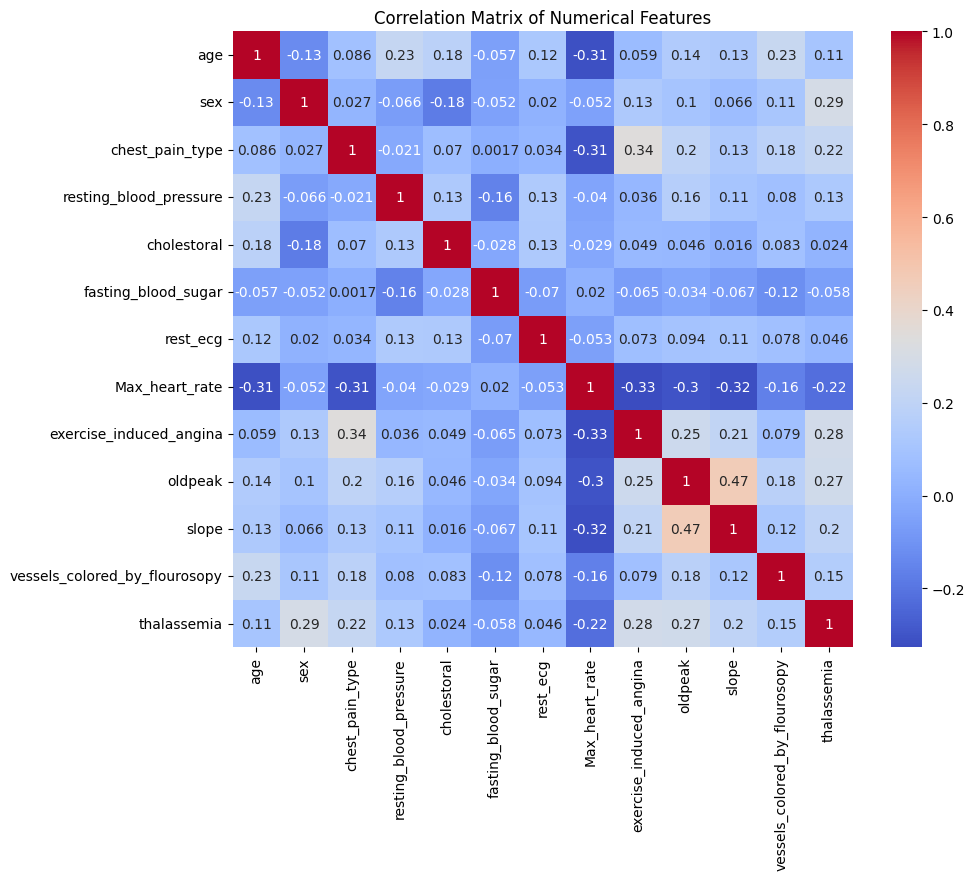

In [16]:
correlation_matrix = data[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [17]:
data.isnull().sum()

,0
age,0
sex,0
chest_pain_type,0
resting_blood_pressure,0
cholestoral,0
fasting_blood_sugar,0
rest_ecg,0
Max_heart_rate,0
exercise_induced_angina,0
oldpeak,0


In [18]:
for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)

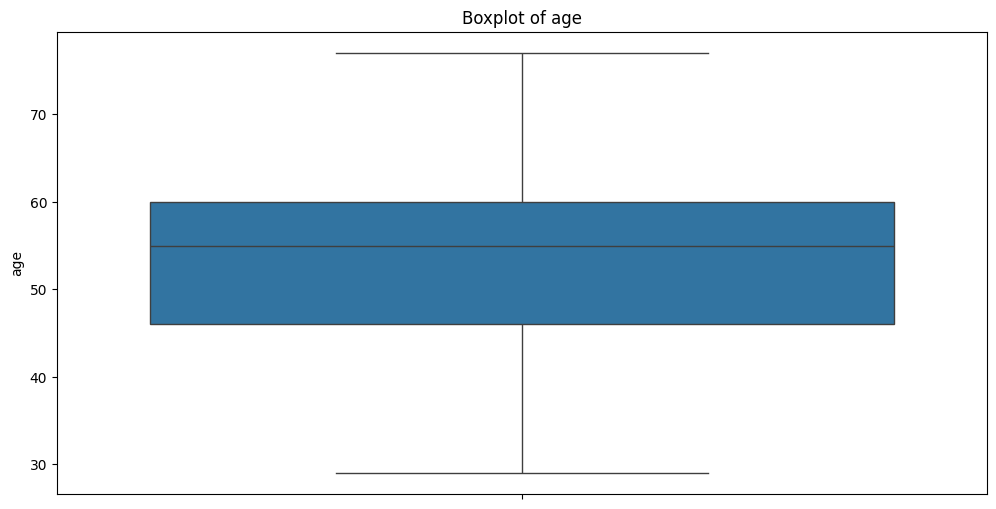

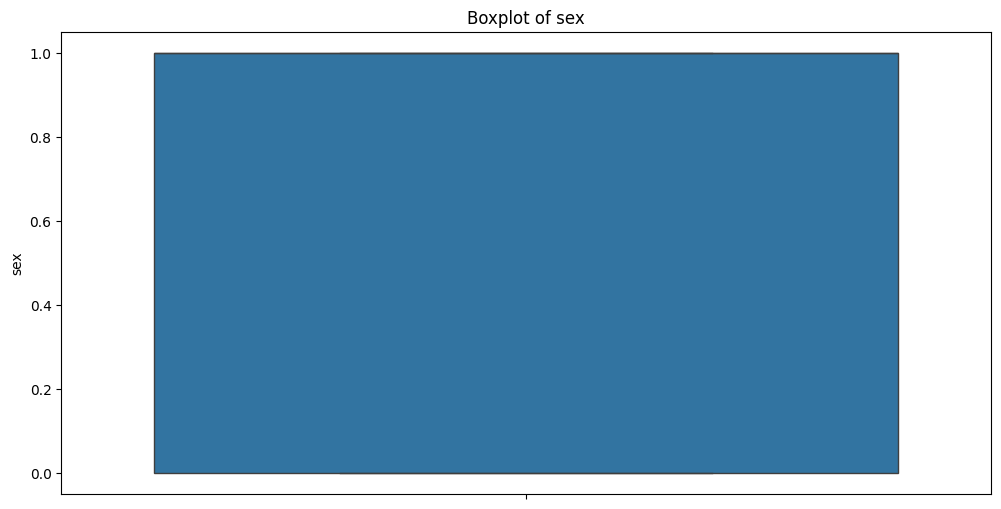

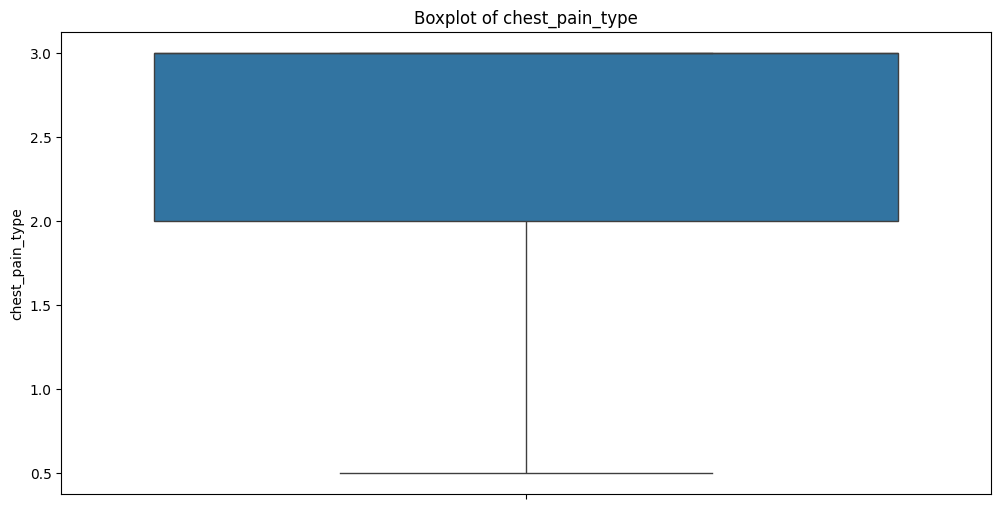

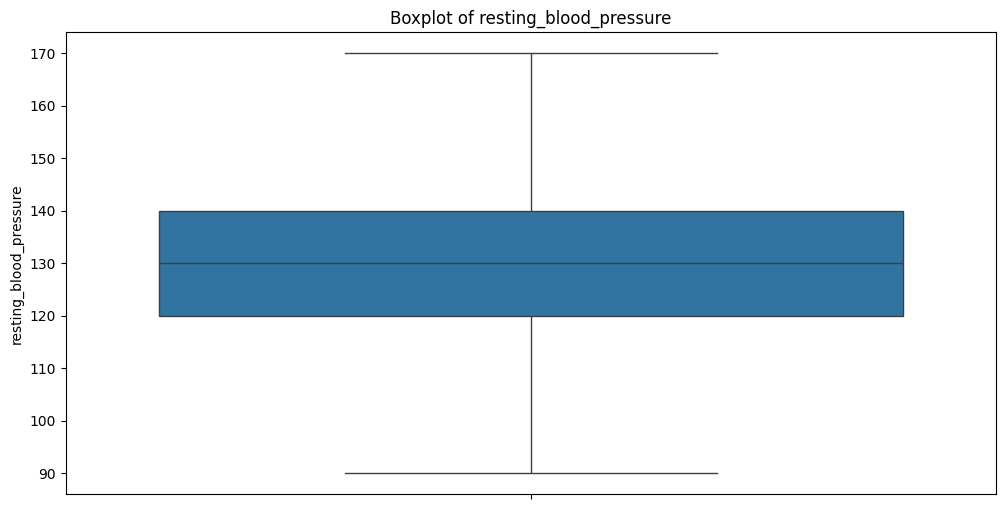

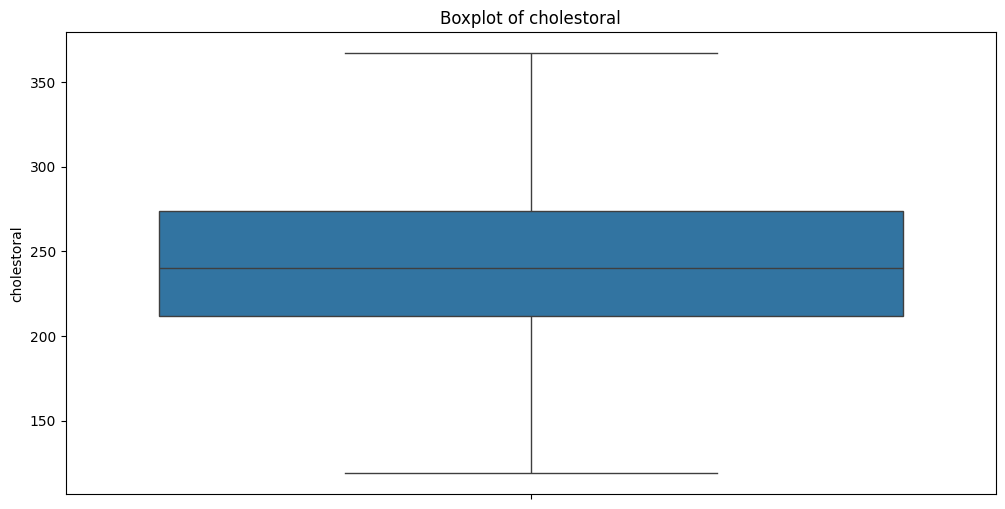

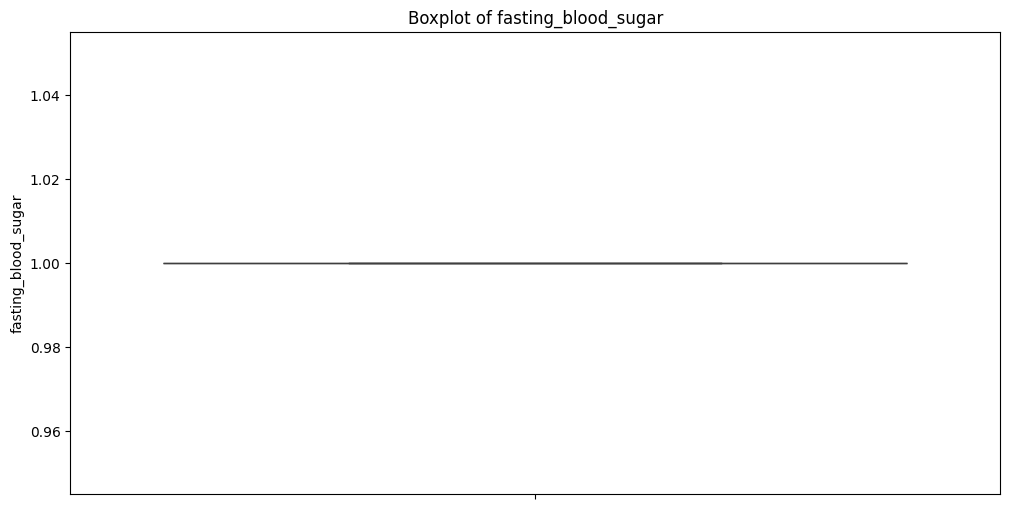

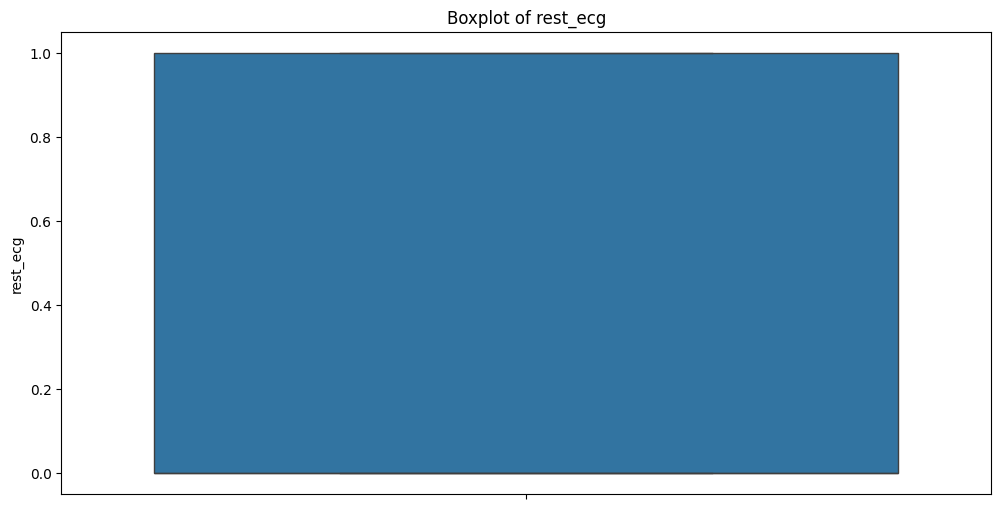

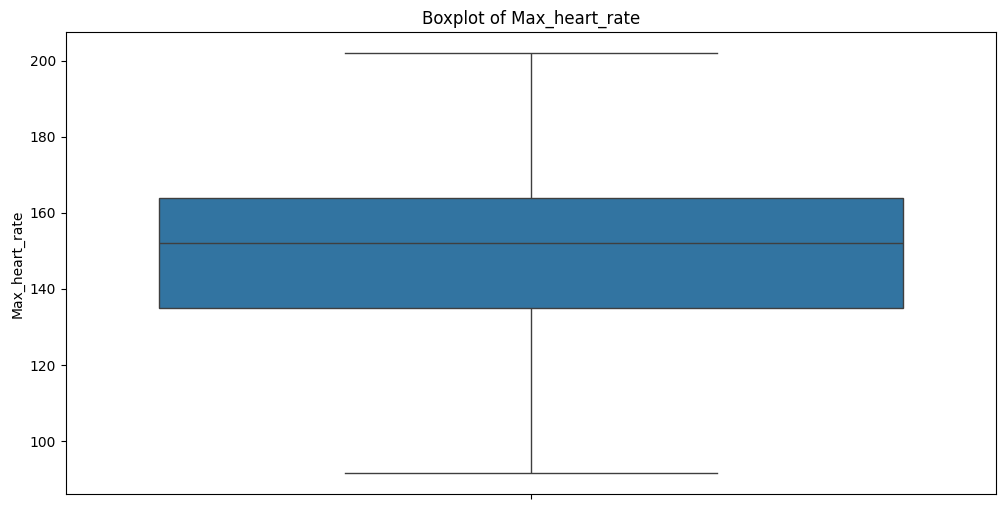

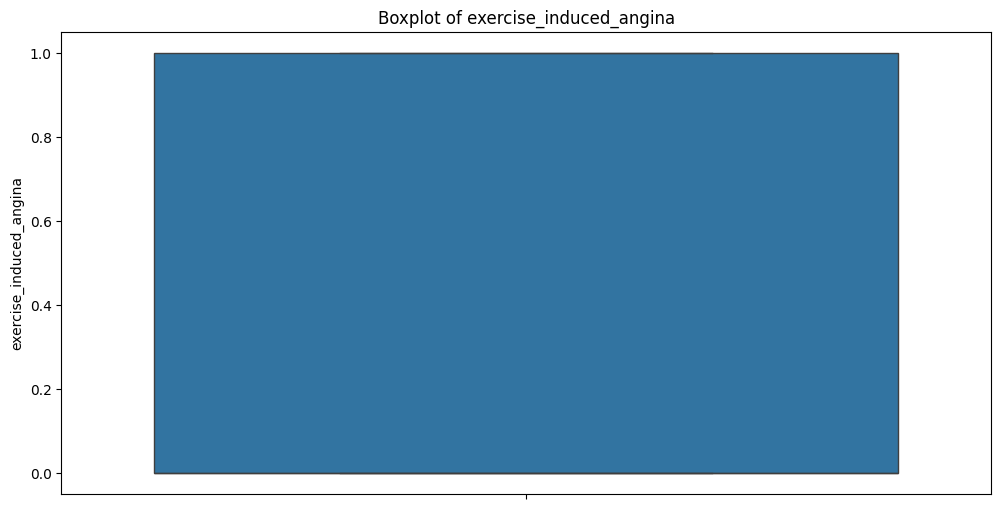

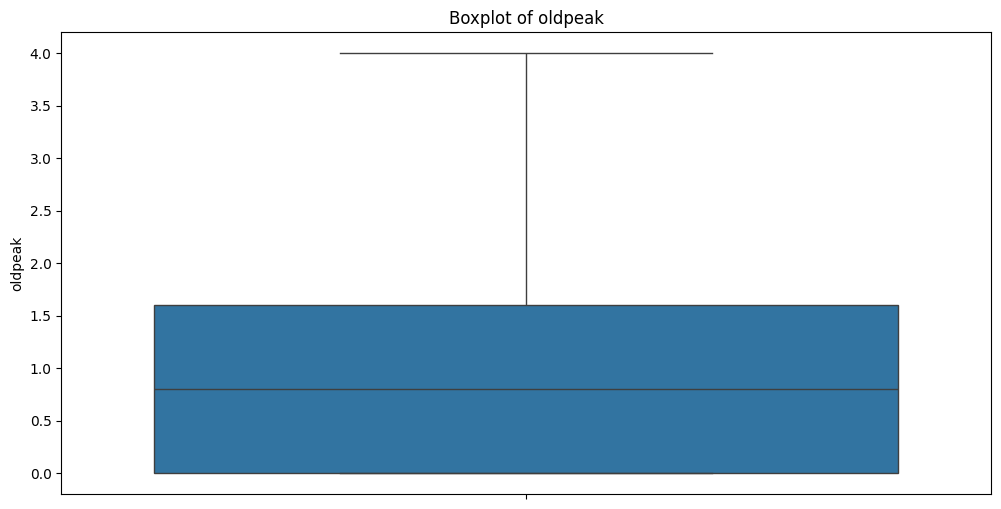

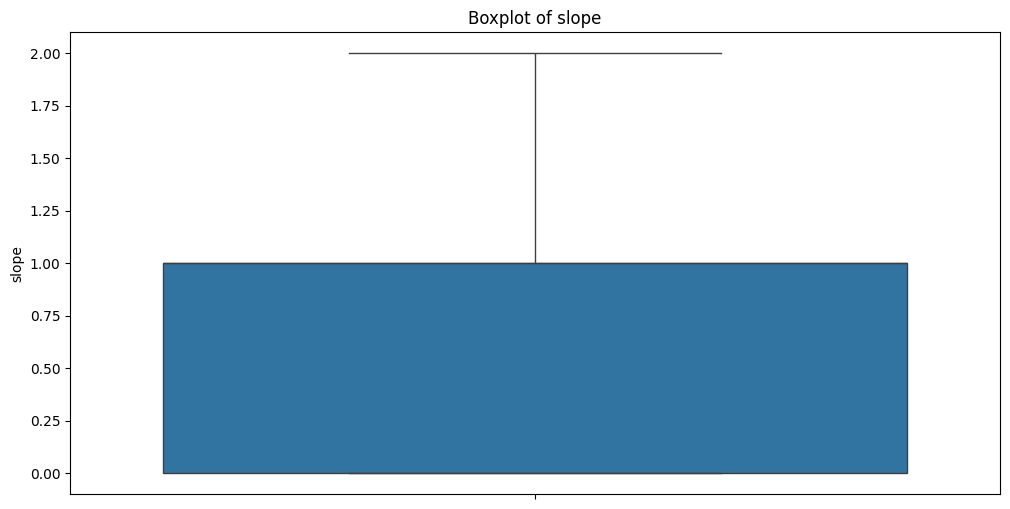

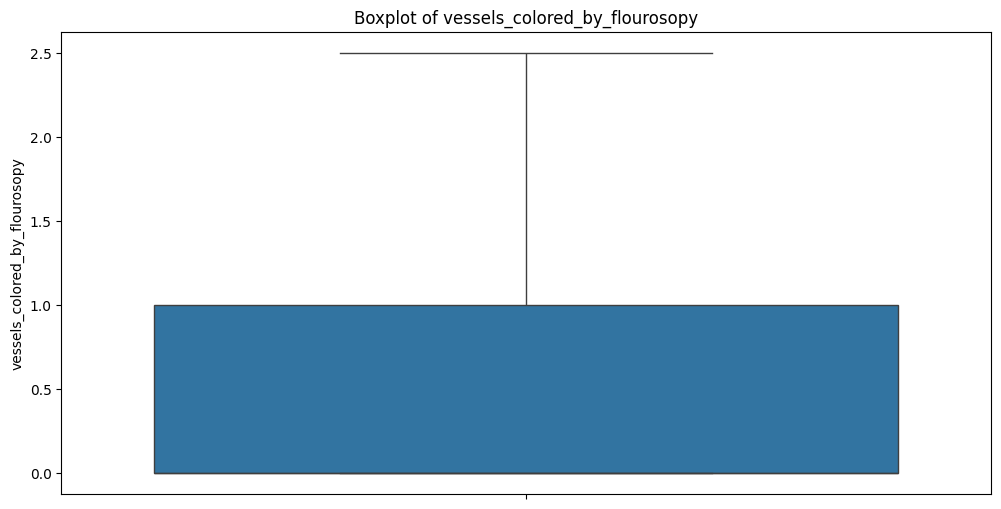

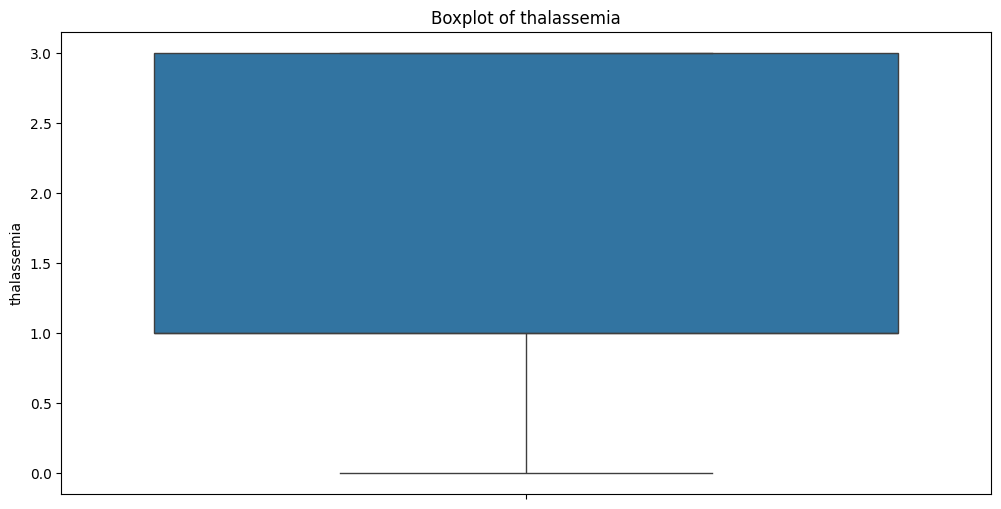

In [19]:
for col in num_cols:
  plt.figure(figsize=(12,6))
  sns.boxplot(y=data[col])
  plt.title(f"Boxplot of {col}")
  plt.show()

In [20]:
# Prepare features and target
X = data.drop('target', axis=1)
y = data['target']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


In [22]:
numerical_cols =["age","resting_blood_pressure","cholestroral","Max_heart_rate","oldpeak","vessels_colored_by_flourosopy"]
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [23]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
y_pred_rf = rf_model.predict(X_test)
print("Training Accuracy:", accuracy_score(y_train, rf_model.predict(X_train)))
print(" Testing Accuracy: ", accuracy_score(y_test, y_pred_rf))

Training Accuracy: 1.0
 Testing Accuracy:  0.9617021276595744


In [25]:
print("Classification Report of Random Forest")
print(classification_report(y_test, y_pred_rf))

Classification Report of Random Forest
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       105
           1       0.95      0.98      0.97       130

    accuracy                           0.96       235
   macro avg       0.96      0.96      0.96       235
weighted avg       0.96      0.96      0.96       235



In [26]:
from sklearn.metrics import  roc_auc_score,  roc_curve,ConfusionMatrixDisplay, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold


,0,1,accuracy,macro avg,weighted avg
precision,0.7615,0.8254,0.7957,0.7934,0.7968
recall,0.7905,0.8000,0.7957,0.7952,0.7957
f1-score,0.7757,0.8125,0.7957,0.7941,0.7961
support,105.0000,130.0000,0.7957,235.0000,235.0000


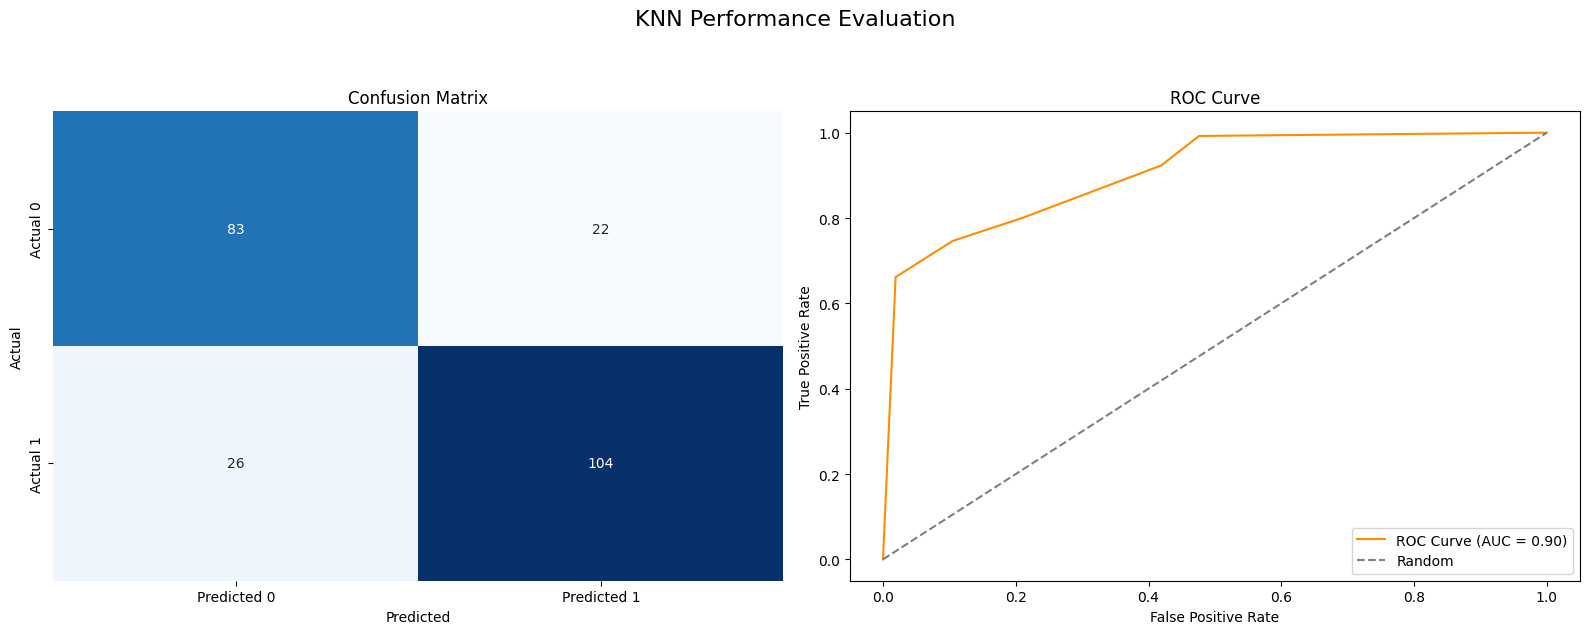

,0,1,accuracy,macro avg,weighted avg
precision,0.7723,0.7985,0.7872,0.7854,0.7868
recall,0.7429,0.8231,0.7872,0.7830,0.7872
f1-score,0.7573,0.8106,0.7872,0.7839,0.7868
support,105.0000,130.0000,0.7872,235.0000,235.0000


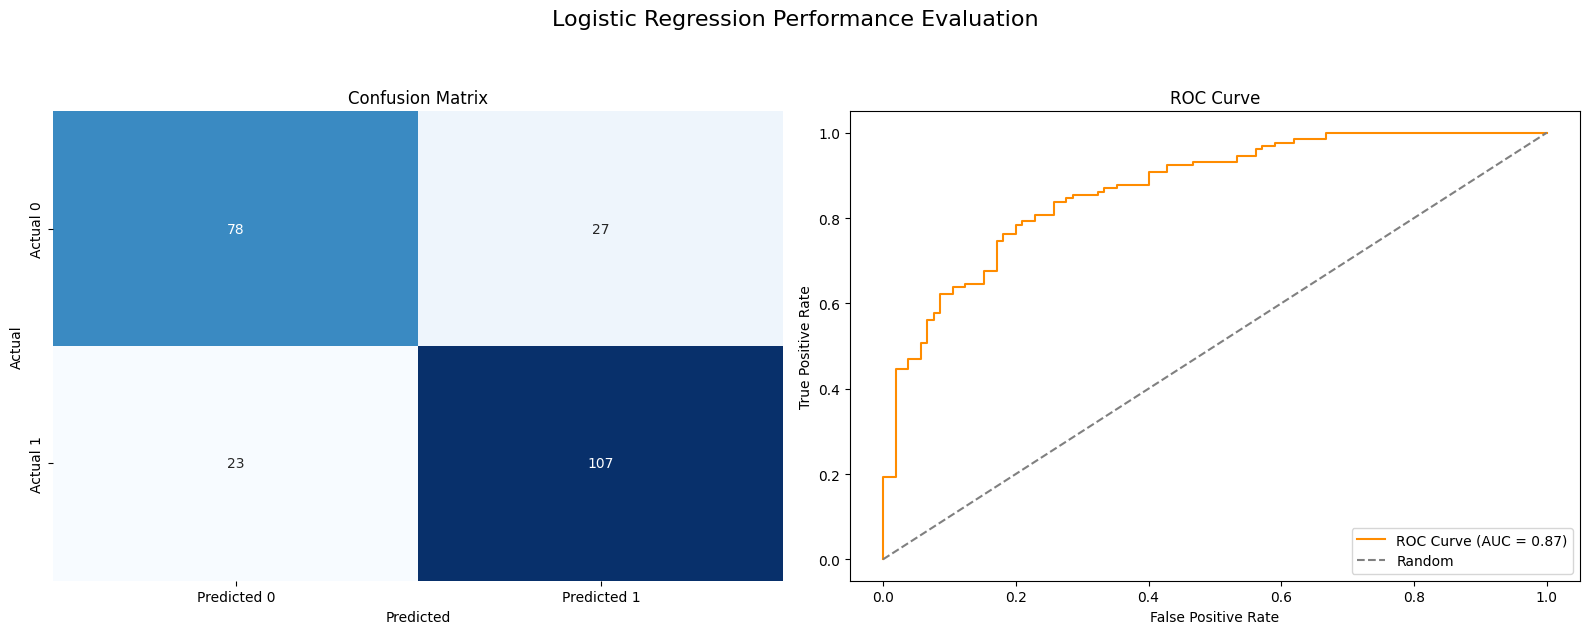

,0,1,accuracy,macro avg,weighted avg
precision,0.7500,0.7939,0.7745,0.7719,0.7743
recall,0.7429,0.8000,0.7745,0.7714,0.7745
f1-score,0.7464,0.7969,0.7745,0.7717,0.7744
support,105.0000,130.0000,0.7745,235.0000,235.0000


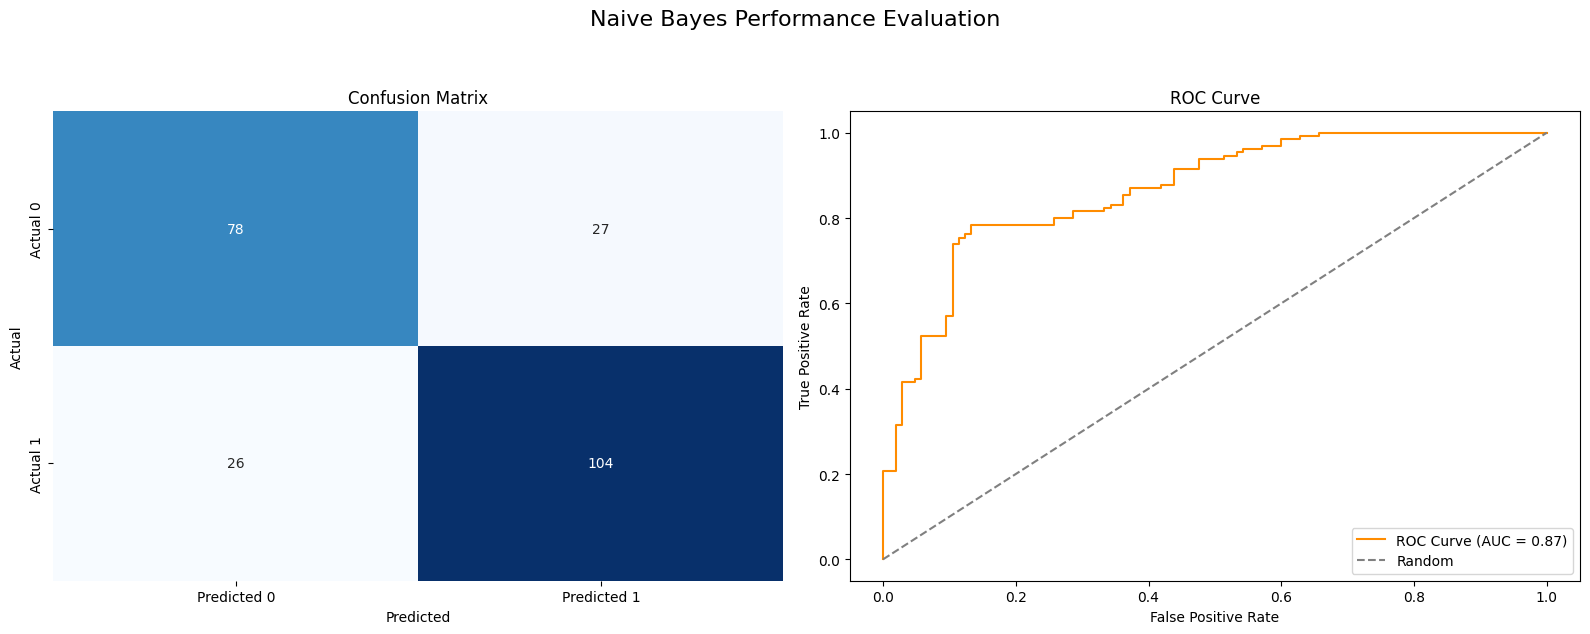

,0,1,accuracy,macro avg,weighted avg
precision,0.9083,0.9524,0.9319,0.9303,0.9327
recall,0.9429,0.9231,0.9319,0.9330,0.9319
f1-score,0.9252,0.9375,0.9319,0.9314,0.9320
support,105.0000,130.0000,0.9319,235.0000,235.0000


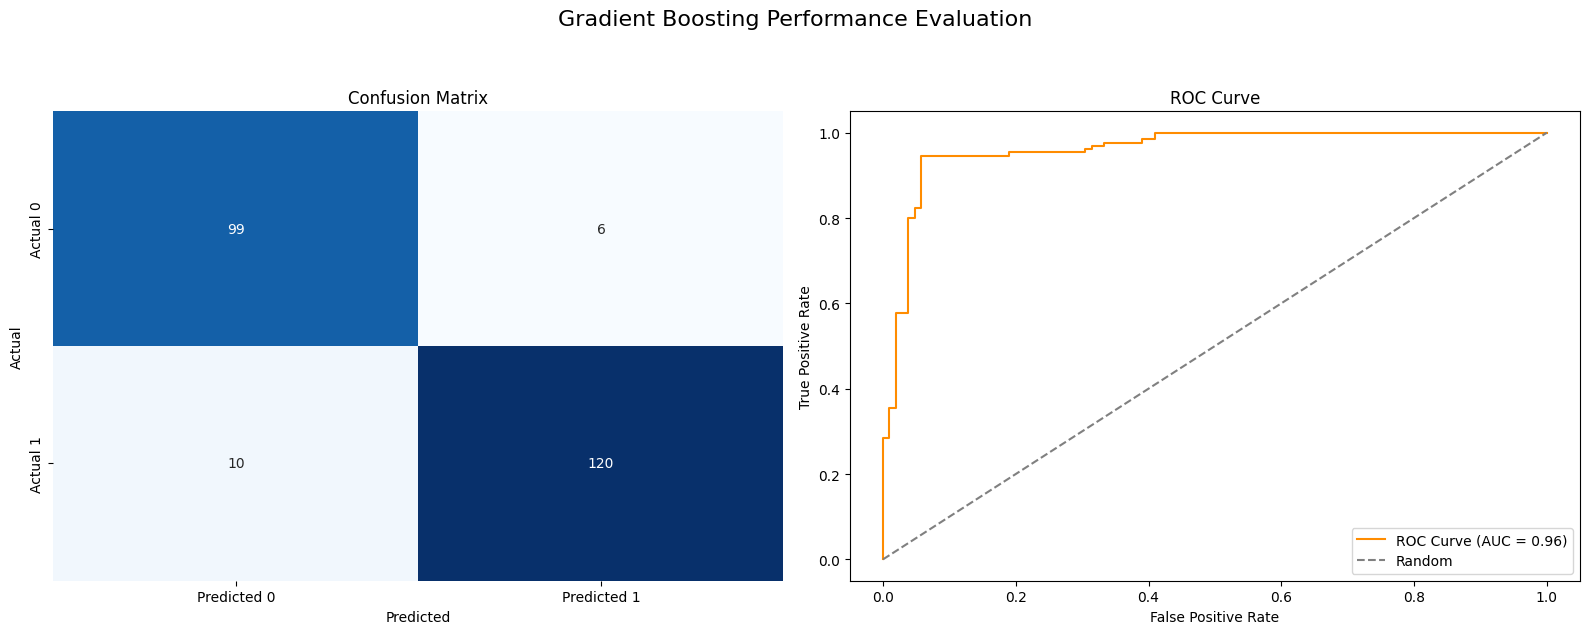

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:29:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,0,1,accuracy,macro avg,weighted avg
precision,0.9528,0.9690,0.9617,0.9609,0.9618
recall,0.9619,0.9615,0.9617,0.9617,0.9617
f1-score,0.9573,0.9653,0.9617,0.9613,0.9617
support,105.0000,130.0000,0.9617,235.0000,235.0000


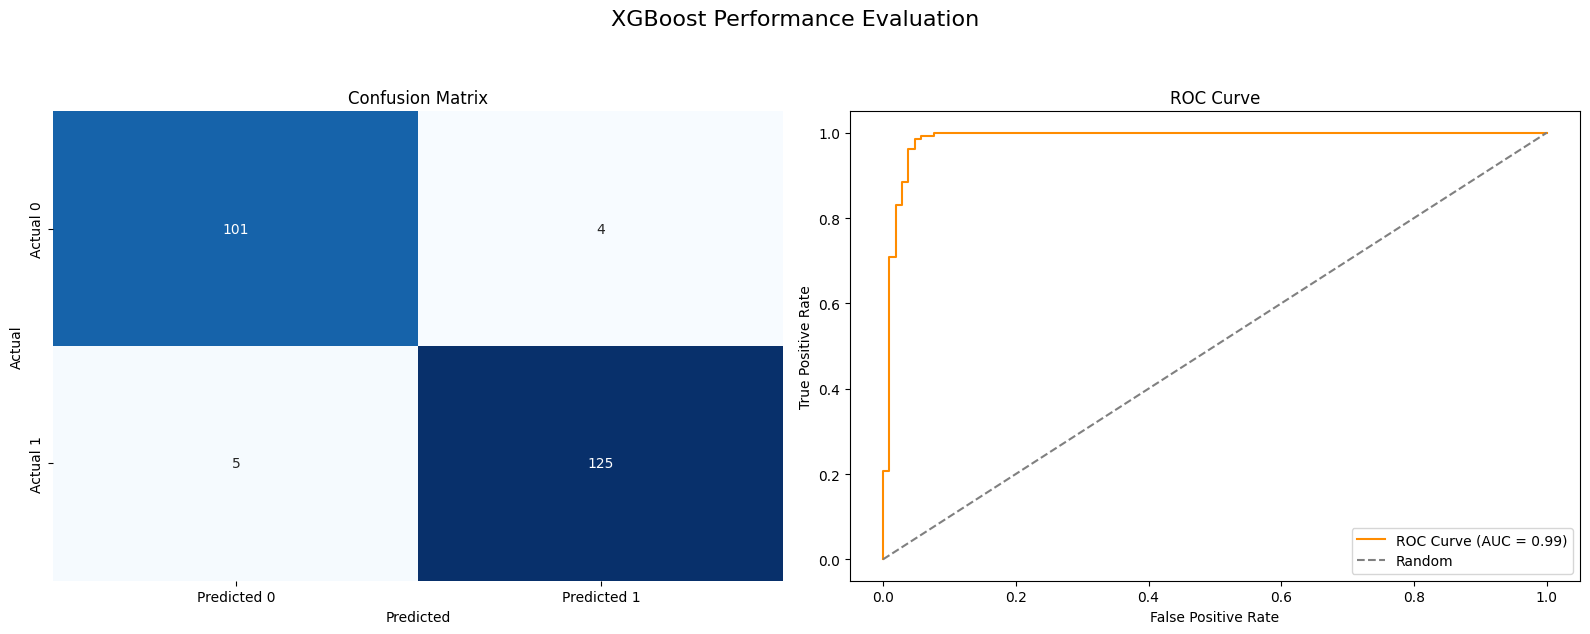

,Model,Training Accuracy,Testing Accuracy,Precision,Recall,F1-Score,ROC AUC,Fit Status
4,XGBoost,0.998936,0.961702,0.961771,0.961702,0.961719,0.986300,Well-Generalized
3,Gradient Boosting,0.972340,0.931915,0.932666,0.931915,0.932019,0.960366,Well-Generalized
0,KNN,0.903191,0.795745,0.796833,0.795745,0.796058,0.904652,Overfitting
1,Logistic Regression,0.808511,0.787234,0.786788,0.787234,0.786780,0.868425,Well-Generalized
2,Naive Bayes,0.805319,0.774468,0.774281,0.774468,0.774361,0.866667,Well-Generalized


In [27]:
from IPython.display import display, HTML

def evaluate_models(X_train, y_train, X_test, y_test, models=None):
    """
    Evaluate multiple machine learning models and generate beautiful reports with visualizations.
    Also identifies whether models overfit, underfit, or are well-generalized.

    Parameters:
    X_train, y_train: Training data
    X_test, y_test: Test data
    models: Dictionary of models to evaluate (if None, uses default set)

    Returns:
    DataFrame with model performance metrics
    """

    # Default models if none provided
    if models is None:
        models = {
            "KNN": KNeighborsClassifier(),                    # White Box
            "Logistic Regression": LogisticRegression(max_iter=1000),  # White Box
            "Naive Bayes": GaussianNB(),                      # White Box
            "Gradient Boosting": GradientBoostingClassifier(),# Black Box
            "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),  # Black Box
        }

    black_box_models = {"Gradient Boosting", "XGBoost"}
    white_box_models = {"KNN", "Logistic Regression", "Naive Bayes"}

    results = []

    # Add custom CSS style for classification report
    display(HTML("""
        <style>
            .report-table {
                color: #222;
                background-color: white;
                border-collapse: collapse;
                width: 100%;
            }
            .report-table th {
                background-color: #2e6c80;
                color: white;
                padding: 8px;
                text-align: center;
            }
            .report-table td {
                color: #4682b4;
                padding: 8px;
                text-align: center;
                border: 1px solid #ddd;
            }
        </style>
    """))

    display(HTML("<h1 style='color:#2e6c80; text-align:center;'>Machine Learning Model Evaluation Report</h1>"))
    display(HTML("<hr style='border:2px solid #2e6c80'>"))

    for name, model in models.items():
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else [0]*len(y_test)

        training_accuracy = accuracy_score(y_train, model.predict(X_train))
        testing_accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

        # Check for overfitting or underfitting
        fit_status = "Well-Generalized"
        if training_accuracy - testing_accuracy > 0.1:
            fit_status = "Overfitting"
        elif testing_accuracy - training_accuracy > 0.1:
            fit_status = "Underfitting"

        model_type = "Black Box Model" if name in black_box_models else "White Box Model"

        results.append({
            'Model': name,
            'Training Accuracy': training_accuracy,
            'Testing Accuracy': testing_accuracy,
            'Precision': report['weighted avg']['precision'],
            'Recall': report['weighted avg']['recall'],
            'F1-Score': report['weighted avg']['f1-score'],
            'ROC AUC': roc_auc,
            'Fit Status': fit_status
        })

        # Styled Report
        display(HTML(f"""
            <div style='background-color:#f0f8ff; padding:15px; border-radius:10px; margin-bottom:20px;'>
                <h2 style='color:#2e6c80;'>{name} Evaluation</h2>
                <h4 style='color:#444; font-style:italic; margin-top:-10px;'>{model_type}</h4>
                <h3 style='color:#4682b4;'>Classification Metrics</h3>
                {pd.DataFrame(report).round(4).to_html(classes='report-table')}
                <div style="margin-top:10px; font-size:16px; color:#2e6c80;">
                    <strong>Training Accuracy:</strong> {training_accuracy:.4f} &nbsp; | &nbsp;
                    <strong>Testing Accuracy:</strong> {testing_accuracy:.4f} &nbsp; | &nbsp;
                    <strong>ROC AUC:</strong> {roc_auc:.4f} &nbsp; | &nbsp;
                    <strong>Status:</strong> <span style='font-weight:bold;'>{fit_status}</span>
                </div>
            </div>
        """))

        # Visualization
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
        fig.suptitle(f'{name} Performance Evaluation', fontsize=16, y=1.05)

        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax1,
                    xticklabels=['Predicted 0', 'Predicted 1'],
                    yticklabels=['Actual 0', 'Actual 1'])
        ax1.set_title("Confusion Matrix")
        ax1.set_xlabel("Predicted")
        ax1.set_ylabel("Actual")

        ax2.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='darkorange')
        ax2.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
        ax2.set_xlabel("False Positive Rate")
        ax2.set_ylabel("True Positive Rate")
        ax2.set_title("ROC Curve")
        ax2.legend(loc="lower right")

        plt.tight_layout()
        plt.show()
        plt.close()

    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values('Testing Accuracy', ascending=False)

    display(HTML("<h2 style='color:#2e6c80; text-align:center;'>Model Performance Summary</h2>"))

    styled_table = results_df.style \
        .background_gradient(cmap='Blues', subset=['Testing Accuracy', 'ROC AUC']) \
        .set_properties(**{'text-align': 'center', 'border': '1px solid white'}) \
        .set_table_styles([{
            'selector': 'th',
            'props': [
                ('background-color', '#2e6c80'),
                ('color', 'white'),
                ('text-align', 'center')
            ]
        }])

    display(HTML(styled_table.to_html()))

    return results_df

# Usage:
results = evaluate_models(X_train, y_train, X_test, y_test)


In [28]:
def check_overfitting_underfitting(results_df, threshold=0.05):
    """
    Checks each model for signs of overfitting or underfitting based on training vs. testing accuracy.

    Parameters:
    results_df: DataFrame from evaluate_models()
    threshold: Accuracy gap threshold to consider overfitting

    Returns:
    DataFrame with additional column: 'Model Fit Status'
    """
    fit_status = []

    for _, row in results_df.iterrows():
        train_acc = row['Training Accuracy']
        test_acc = row['Testing Accuracy']
        acc_diff = train_acc - test_acc

        if train_acc < 0.75 and test_acc < 0.75:
            status = 'Underfitting'
        elif acc_diff > threshold:
            status = 'Overfitting'
        else:
            status = 'Good Fit'

        fit_status.append(status)

    results_df['Model Fit Status'] = fit_status

    display(HTML("<h2 style='color:#2e6c80; text-align:center;'>Overfitting/Underfitting Analysis</h2>"))
    display(results_df[['Model', 'Training Accuracy', 'Testing Accuracy', 'Model Fit Status']].style
            .applymap(lambda x: 'background-color:#ffa07a' if x == 'Overfitting' else
                      'background-color:#f0e68c' if x == 'Underfitting' else
                      'background-color:#2e8b57', subset=['Model Fit Status']))

    return results_df

# Remove the incorrect indentation from the line below
result_df = check_overfitting_underfitting(results)

<ipython-input-28-1572804e1591>:32: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(lambda x: 'background-color:#ffa07a' if x == 'Overfitting' else


,Model,Training Accuracy,Testing Accuracy,Model Fit Status
4,XGBoost,0.998936,0.961702,Good Fit
3,Gradient Boosting,0.972340,0.931915,Good Fit
0,KNN,0.903191,0.795745,Overfitting
1,Logistic Regression,0.808511,0.787234,Good Fit
2,Naive Bayes,0.805319,0.774468,Good Fit


In [29]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


grid_search = GridSearchCV(RandomForestClassifier(random_state=42),param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
# Fit to the training data
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


best_model = grid_search.best_estimator_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Accuracy: 0.9574468085106383


In [30]:
y_pred = best_model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test,y_pred))


Accuracy:  0.9659574468085106
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       105
           1       0.96      0.98      0.97       130

    accuracy                           0.97       235
   macro avg       0.97      0.96      0.97       235
weighted avg       0.97      0.97      0.97       235



,0,1,accuracy,macro avg,weighted avg
precision,0.9709,0.9621,0.966,0.9665,0.9660
recall,0.9524,0.9769,0.966,0.9647,0.9660
f1-score,0.9615,0.9695,0.966,0.9655,0.9659
support,105.0000,130.0000,0.966,235.0000,235.0000


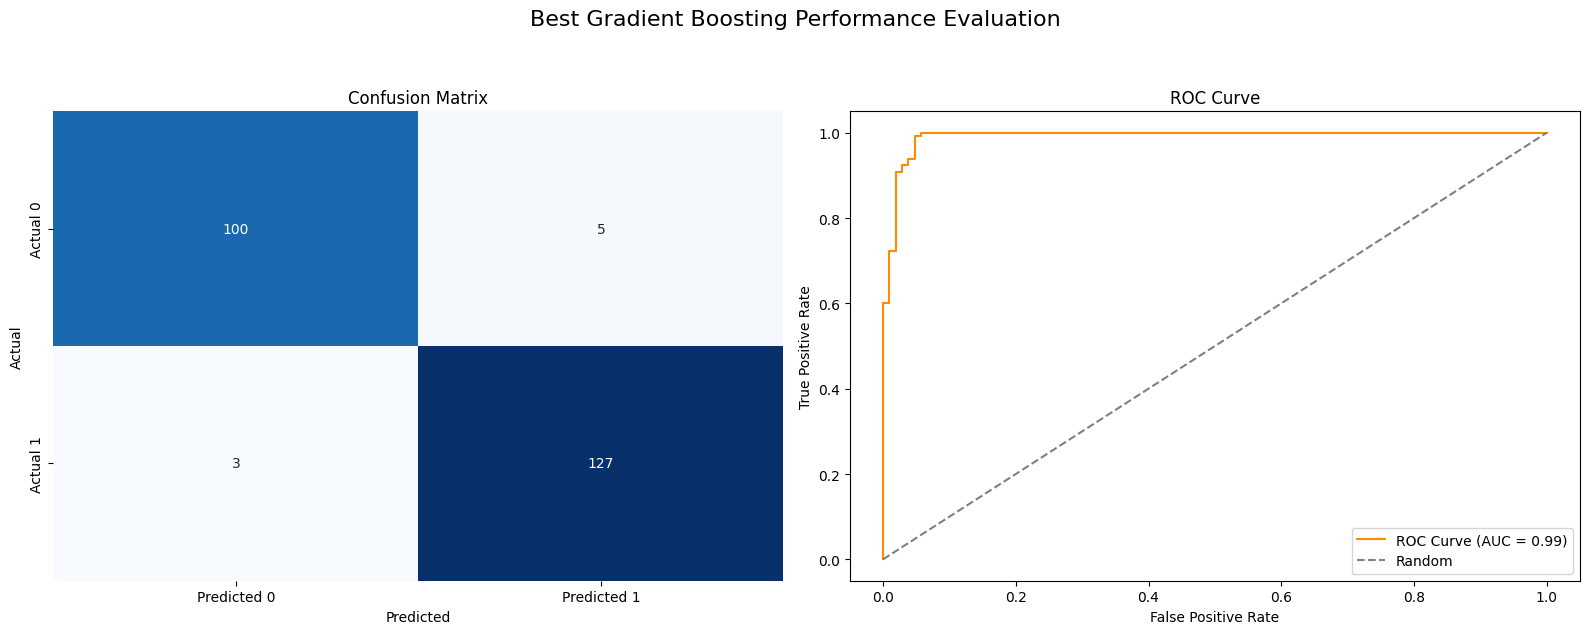

,Model,Training Accuracy,Testing Accuracy,Precision,Recall,F1-Score,ROC AUC,Fit Status
0,Best Gradient Boosting,0.997872,0.965957,0.966032,0.965957,0.965924,0.991282,Well-Generalized


,Model,Training Accuracy,Testing Accuracy,Precision,Recall,F1-Score,ROC AUC,Fit Status
0,Best Gradient Boosting,0.997872,0.965957,0.966032,0.965957,0.965924,0.991282,Well-Generalized


In [31]:
# Define the dictionary containing the best Gradient Boosting model
models_to_evaluate = {"Best Gradient Boosting": best_model}

# Call the evaluate_models function with the dictionary
evaluate_models(X_train, y_train, X_test, y_test, models_to_evaluate)

In [32]:
# import joblib
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_model.fit(X_train, y_train)

# # Save the model
# joblib.dump(rf_model, 'heart_prediction_model.pkl')
# print("Model saved as heart_prediction_model.pkl")

                          Feature  Importance
7                  Max_heart_rate    0.130750
12                    thalassemia    0.121344
9                         oldpeak    0.113547
0                             age    0.113270
11  vessels_colored_by_flourosopy    0.113123
2                 chest_pain_type    0.102139
4                     cholestoral    0.094329
3          resting_blood_pressure    0.075904
8         exercise_induced_angina    0.049494
10                          slope    0.036630
1                             sex    0.025005
6                        rest_ecg    0.024464
5             fasting_blood_sugar    0.000000


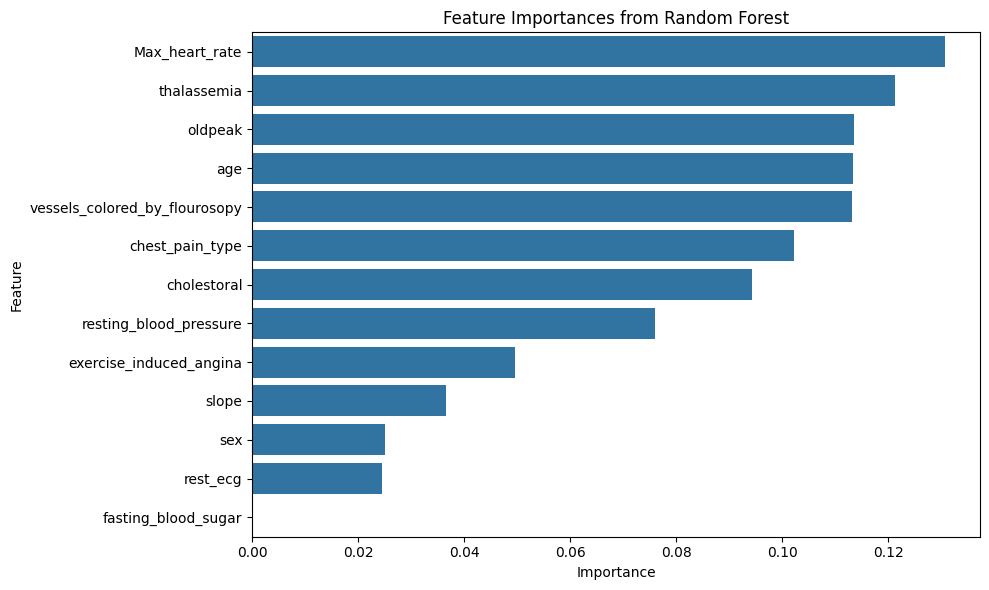

In [33]:
importances = best_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display top features
print(feat_imp)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title('Feature Importances from Random Forest')
plt.tight_layout()
plt.show()

In [48]:
import shap

# Create the SHAP explainer
explainer = shap.Explainer(best_model, X_train)

# Compute SHAP values
shap_values = explainer(X_test)

 97%|=================== | 454/470 [00:27<00:00]       

SHAP Summary Plot (Global Feature Importance):


<Figure size 800x400 with 0 Axes>

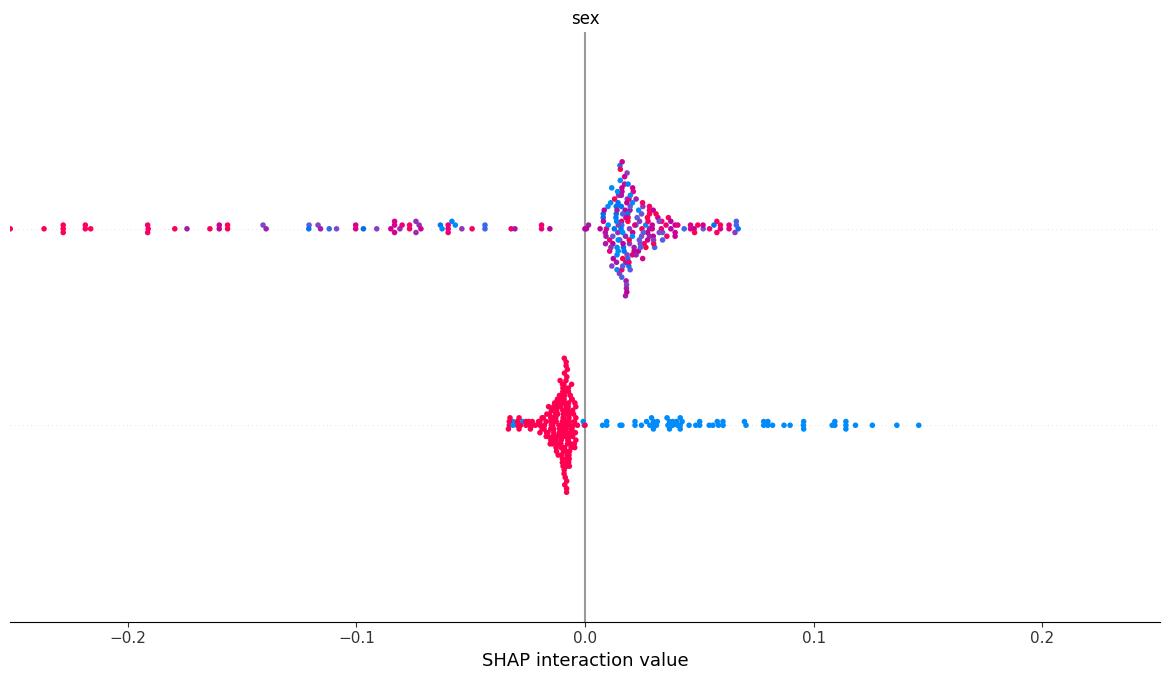

In [49]:
plt.figure(figsize=(8,4))
print("SHAP Summary Plot (Global Feature Importance):")
shap.summary_plot(shap_values, X_test)

In [ ]:
# Calculate the mean absolute SHAP values
mean_abs_shap_values = np.abs(shap_values.values).mean(axis=0)

# Create a DataFrame to visualize feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Mean Absolute SHAP Value': mean_abs_shap_values
}).sort_values(by='Mean Absolute SHAP Value', ascending=False)

print(feature_importance_df)

In [ ]:
shap.plots.bar(shap_values)

<Figure size 640x480 with 0 Axes>

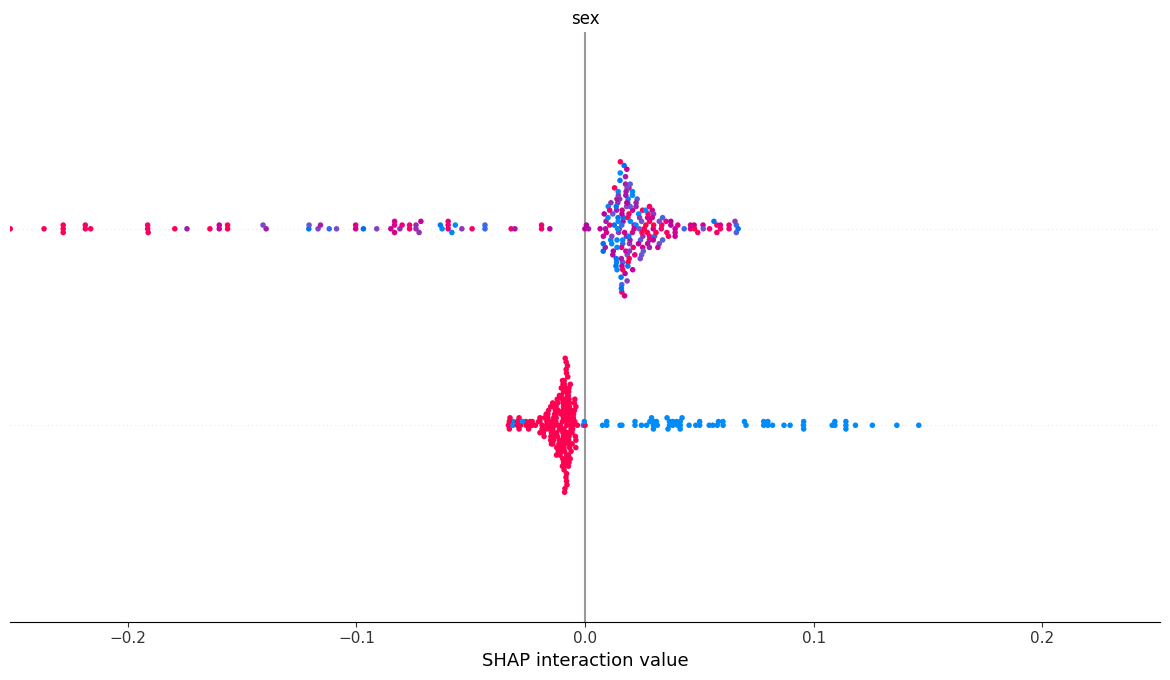

In [56]:
# Feature importance plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

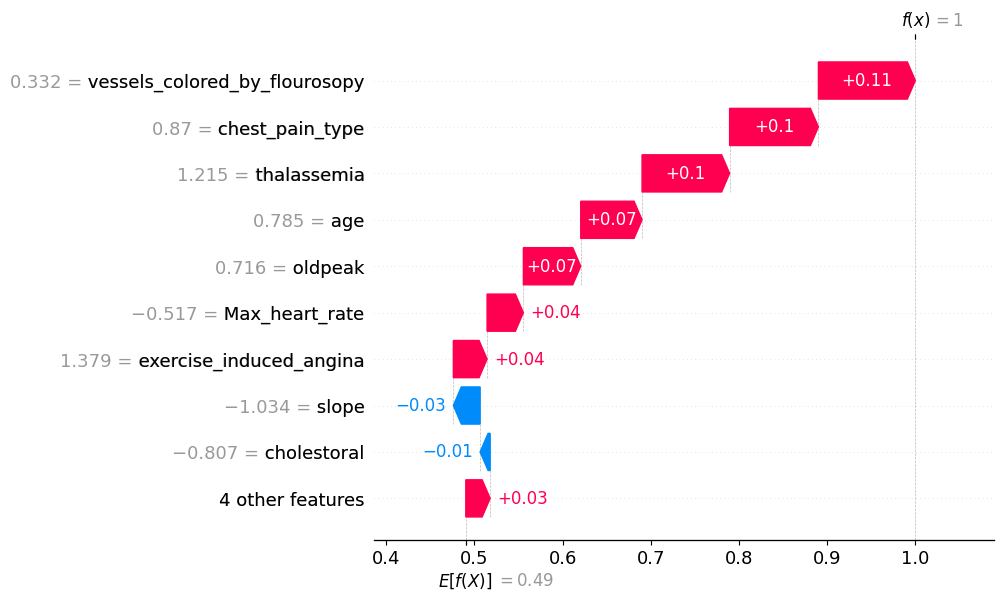

In [57]:
shap.plots.waterfall(shap_values[0, :, 0])

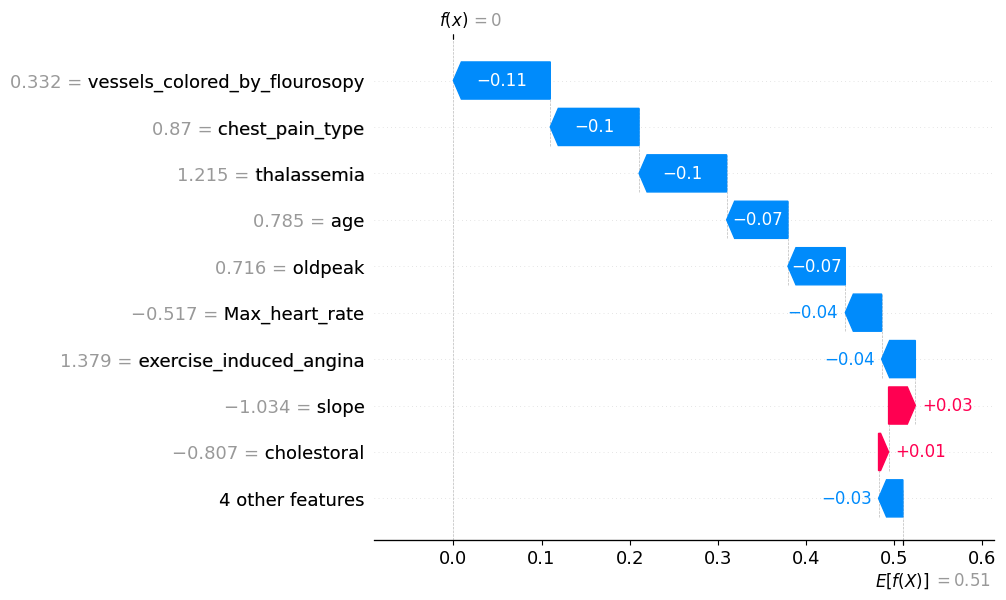

In [58]:
shap.plots.waterfall(shap_values[0, :, 1])


In [61]:
feature_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Mean Absolute SHAP Value': mean_abs_shap_values_per_feature
}).sort_values(by='Mean Absolute SHAP Value', ascending=False)

print(feature_importance_df)

                          Feature  Mean Absolute SHAP Value
11  vessels_colored_by_flourosopy                  0.089842
12                    thalassemia                  0.087374
9                         oldpeak                  0.069765
2                 chest_pain_type                  0.067094
7                  Max_heart_rate                  0.051513
0                             age                  0.050310
8         exercise_induced_angina                  0.040442
4                     cholestoral                  0.027371
10                          slope                  0.024935
1                             sex                  0.024198
3          resting_blood_pressure                  0.022541
6                        rest_ecg                  0.019632
5             fasting_blood_sugar                  0.000000
